In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

G = 6.6743*(10**-11)

In [7]:
#this simulation assumes that the object set at the origin has a mass >> the mass of the orbiter

simulationTime = 35 #simulation length in minutes
deltaT = 1 #simulation resolution, in seconds per timestep. Smaller means more accurate
Mass = 5.2915793*(10**22) #mass of attractor in kilograms
radius = 600000 # radius of attractor
altitude = 200000
initialPosition = radius + altitude #initial distance of orbiter from center of attractor
#add user input planetary mass, and radius. Plot radius

You crashed! Go faster?


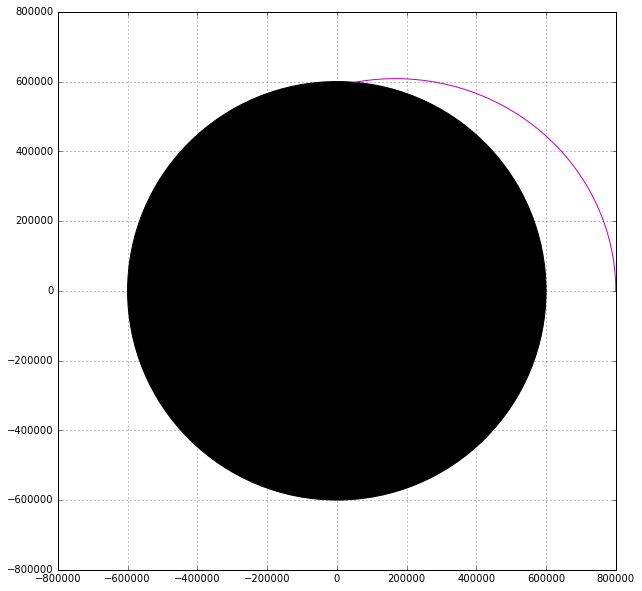

In [8]:
position = np.matrix([[initialPosition],[0.]]) #initial position vector
velocity = np.matrix([[0.],[1800.]])#initial velocity vector
acceleration = np.matrix([[0.],[0.]])   #acceleration vector

xPath = np.zeros(1)
yPath = np.zeros(1)
xPath[0] = position[0]
yPath[0] = position[1]

plt.figure(figsize=(10,10))
plt.grid(True)
for i in range(0, int((simulationTime*60)/deltaT)): #on a loop, perform vector addition, plot new result
    if np.power(((position[0]**2)+(position[1]**2)),0.5) <= radius:
        print('You crashed! Go faster?')
        break
    acceleration[0] = -G*Mass*(1/np.power(((position[0]**2)+(position[1]**2)),1.5))*position[0]
    #calculate acceleration in x
    acceleration[1] = -G*Mass*(1/np.power(((position[0]**2)+(position[1]**2)),1.5))*position[1]
    #calculate acceleration in y
    velocity+=acceleration*deltaT #step velocity forward
    position+=velocity*deltaT #step position forward
    xPath = np.append(xPath, position[0])
    yPath = np.append(yPath, position[1])
    
    
fig=plt.plot(xPath,yPath,'m-')
planet = plt.Circle((0,0),radius,color='k')
plt.gcf().gca().add_artist(planet)
plt.xlim(-initialPosition,initialPosition)
plt.ylim(-initialPosition,initialPosition)
#plt.savefig('orbit.png')
plt.show()